# WITH SEABORN

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental illness or not for killed people
1. Threat types
1. Flee types
<br>

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [3]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
kill.shape

(2535, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

In [5]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [6]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

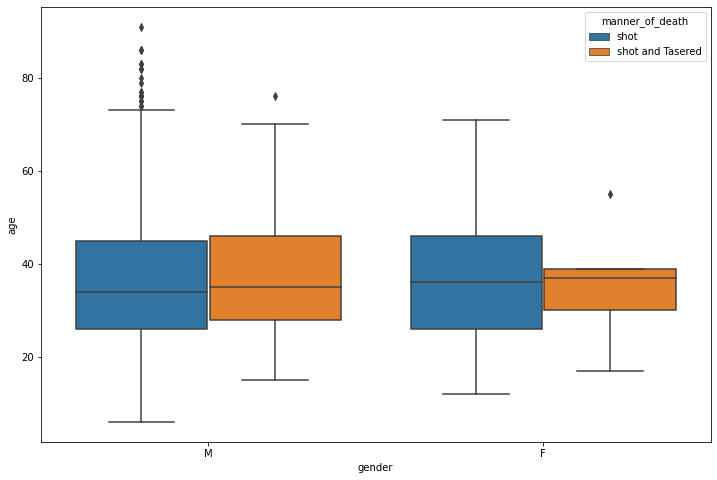

In [7]:
# with seaborn

plt.figure(figsize=(12,8))

sns.boxplot(x="gender", y="age", data=kill, hue="manner_of_death");

## 1b: Swarm Plot 

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

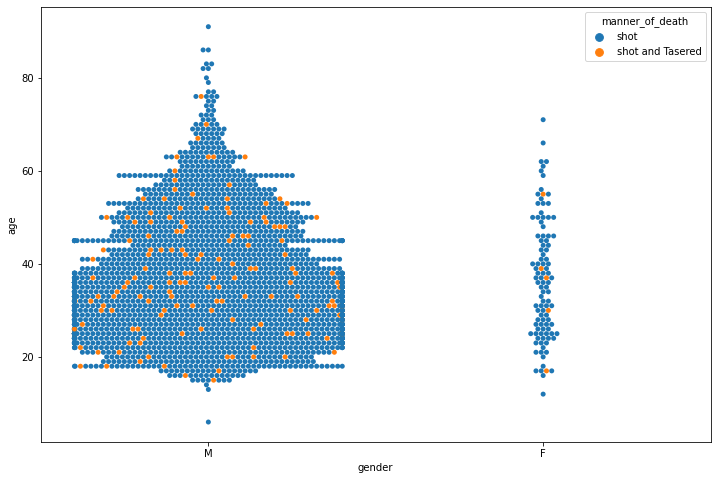

In [8]:
# with seaborn

plt.figure(figsize=(12,8))

sns.swarmplot(x="gender", y="age", data=kill, hue="manner_of_death");

## 2: Plot 12 most dangerous cities

In [9]:
city_freq = kill.city.value_counts().head(12)
city_freq

Los Angeles      39
Phoenix          31
Houston          27
Chicago          25
Las Vegas        21
San Antonio      20
Columbus         19
Austin           18
Miami            18
St. Louis        15
Oklahoma City    14
Tucson           14
Name: city, dtype: int64

In [10]:
city_freq.index

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Las Vegas',
       'San Antonio', 'Columbus', 'Austin', 'Miami', 'St. Louis',
       'Oklahoma City', 'Tucson'],
      dtype='object')

In [11]:
city_freq.values

array([39, 31, 27, 25, 21, 20, 19, 18, 18, 15, 14, 14], dtype=int64)

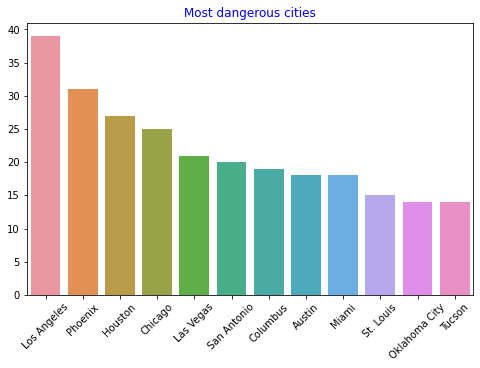

In [12]:
# with seaborn barplot
fig, ax =plt.subplots(figsize=(8,5))

ax = sns.barplot(x=city_freq.index,y=city_freq.values, data=kill)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Most dangerous cities", {"color": "blue"});

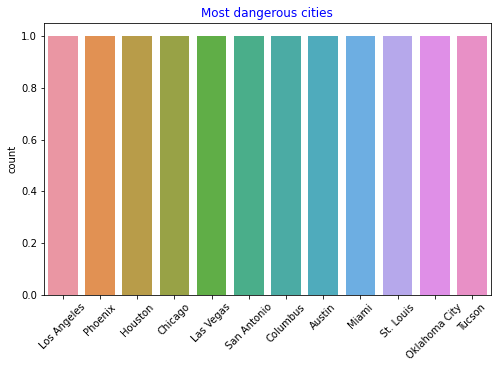

In [13]:
# with seaborn countplot
fig, ax =plt.subplots(figsize=(8,5))
sns.countplot(x=city_freq.index, data=kill)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Most dangerous cities", {"color": "blue"});

## 3: Plot 20 most dangerous states

In [14]:
state_freq = kill.state.value_counts().head(20)
state_freq

CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
IL     62
WA     62
TN     59
LA     57
PA     51
NM     51
AL     50
VA     47
NY     45
SC     44
Name: state, dtype: int64

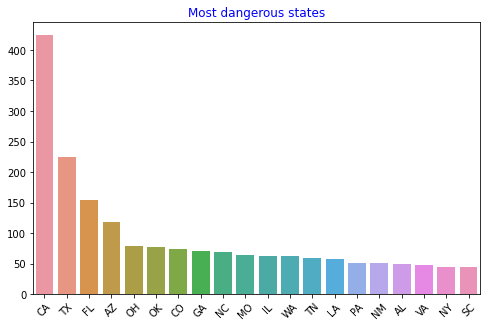

In [15]:
# with seaborn barplot
fig, ax =plt.subplots(figsize=(8,5))

ax = sns.barplot(x=state_freq.index, y=state_freq.values, data=kill)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Most dangerous states", {"color": "blue"});

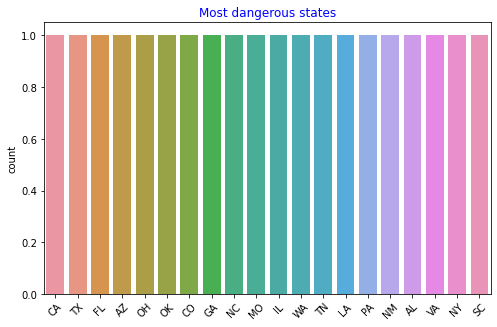

In [16]:
# with seaborn countplot
fig, ax =plt.subplots(figsize=(8,5))

sns.countplot(x=state_freq.index, data=kill)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Most dangerous states", {"color": "blue"});

## 4: Plot Having mental ilness or not for killed people

In [17]:
kill.sample(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
113,151,Howard Brent Means Jr.,15/02/15,shot,gun,34.0,M,W,Iuka,MS,False,attack,Foot,False
2441,2720,TK TK,29/06/17,shot,undetermined,NaN,M,NaN,Burbank,CA,False,undetermined,Not fleeing,False
1644,1843,Caleb J. Douglas,01/09/16,shot,gun,18.0,M,W,Wichita,KS,False,other,Car,True


In [18]:
illness = kill.signs_of_mental_illness.value_counts()
illness

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

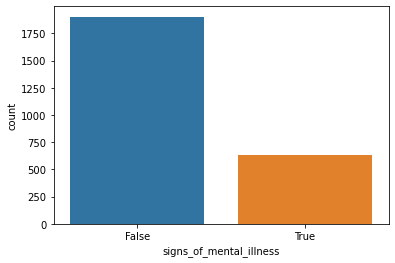

In [19]:
# with seaborn
sns.countplot(x=kill.signs_of_mental_illness);

## 5: Plot number of Threat Types

In [20]:
kill.sample(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
1223,1402,Raymond Gonzalez,23/03/16,shot,gun,34.0,M,H,Fresno,CA,False,attack,Foot,True
1559,1749,Mario Martinez Torres,31/07/16,shot,undetermined,38.0,M,H,Wapato,WA,False,undetermined,Not fleeing,False
1875,2092,David K. Crosby-Dowdy,30/11/16,shot,gun,25.0,M,B,Kansas City,MO,False,other,Not fleeing,False


In [21]:
threats_freq = kill.threat_level.value_counts()
threats_freq

attack          1611
other            766
undetermined     158
Name: threat_level, dtype: int64

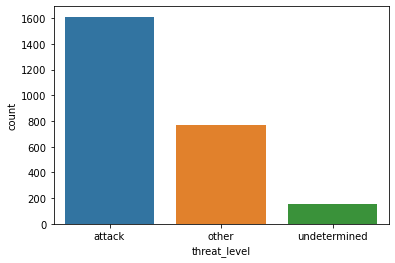

In [22]:
# with seaborn
sns.countplot(x=kill.threat_level);

## 6: Plot number of Flee Types

In [23]:
flee_freq = kill.flee.value_counts()
flee_freq

Not fleeing    1695
Car             385
Foot            294
Other            96
Name: flee, dtype: int64

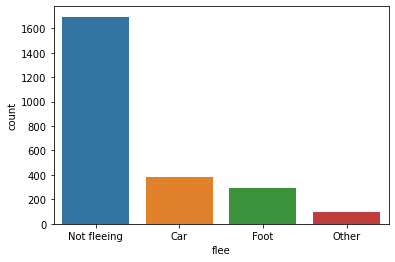

In [24]:
# with seaborn
sns.countplot(x=kill.flee);